# Plotting Multiple Data Series

In [1]:
import pandas as pd
import numpy as np
from random import choice, random, randint
import seaborn as sns
from faker import Faker
fake = Faker()

In [2]:
r = range(1000) # rows

df = pd.DataFrame({
    'Date': [pd.to_datetime(fake.date_between(start_date = '-1y', end_date = 'today')) for _ in r],
    'Product': [choice(['A', 'B', 'C']) for _ in r],
    'Sales': [random() * 100 for _ in r]
})

df['Costs'] = df['Sales'] * [randint(10, 25) / 100 for _ in r]
# df.head()
df.dtypes

Date       datetime64[ns]
Product            object
Sales             float64
Costs             float64
dtype: object

In [ ]:
#Lets examine the sales by day

In [4]:
by_date = df.groupby('Date')['Sales', 'Costs'].sum()
by_date.head()

,Sales,Costs
Date,,
2018-11-01,103.974920,19.348409
2018-11-02,87.383026,12.233624
2018-11-04,165.908650,34.408906
2018-11-05,93.046224,17.678783
2018-11-06,106.364699,23.472335


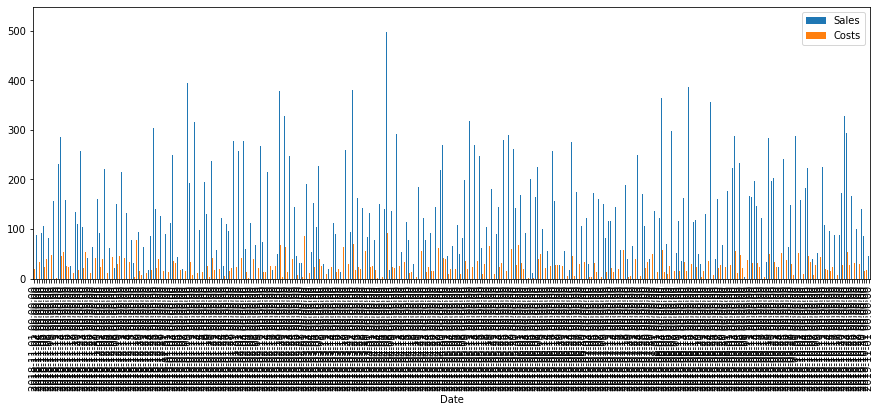

In [7]:
by_date.plot(
    kind = 'bar',
    figsize = (15,5), #a tuple (widtgh, height) in inches
)

In [11]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
by_date.iplot(kind = 'bar')qaQA

# By month

In [12]:
# import datetime
# import calendar

df['Month'] = df['Date'].dt.month
df.head()

,Date,Product,Sales,Costs,Month
0,2019-08-05,C,39.314517,4.717742,8
1,2019-02-02,A,98.076841,21.576905,2
2,2018-12-11,C,90.969114,21.832587,12
3,2019-08-14,B,47.146564,7.543450,8
4,2018-11-16,C,93.442055,21.491673,11


In [13]:
by_month = df.groupby(['Month'])['Sales', 'Costs'].sum()
by_month.head()

,Sales,Costs
Month,,
1,3932.791737,650.232407
2,3918.752015,688.960815
3,4311.732035,757.464550
4,4241.179791,782.043817
5,5258.409899,958.890973


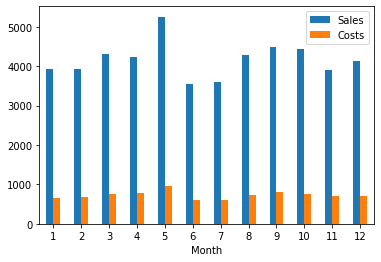

In [16]:
by_month.plot(kind = 'bar', rot = 0)

In [17]:
by_month.iplot(kind = 'bar')

# Line

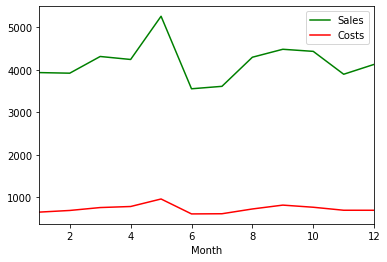

In [18]:
by_month.plot(kind = 'line', rot = 0, color = ['green', 'red'])

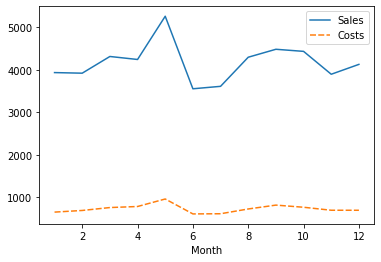

In [19]:
sns.lineplot(data = by_month)

In [21]:
by_month.iplot(kind = 'line')

# Scatter

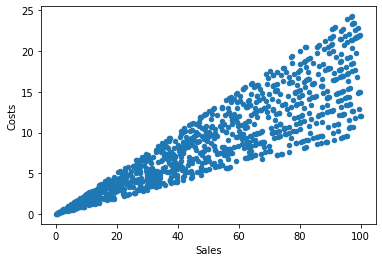

In [22]:
df.plot(x = 'Sales', y = 'Costs', kind = 'scatter')

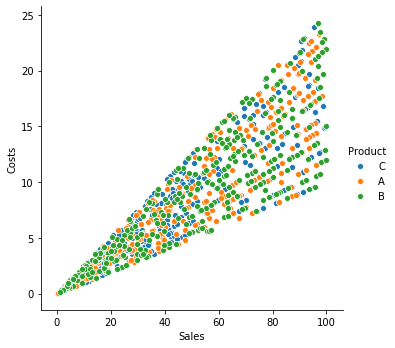

In [23]:
sns.pairplot(x_vars=['Sales'], y_vars=['Costs'], data = df, hue = "Product", height = 5)

In [25]:
df.iplot(
    x = 'Sales',
    y = 'Costs',
    categories = 'Product',
    xTitle = 'Sales',
    yTitle = 'Shipping Costs',
    title = 'Sales vs Shipping Costs'

)

# Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2b127cc0>,
      dtype=object)

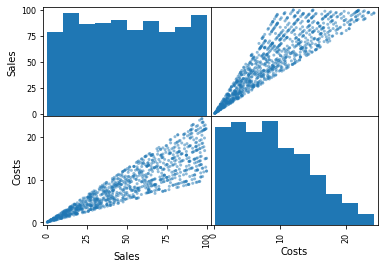

In [26]:
pd.plotting.scatter_matrix(df[['Sales', 'Costs']])

# Bokeh

In [27]:
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...